# Visualization of training and test curves with different optimizers
This notebook is modified from https://github.com/Luolc/AdaBound/blob/master/demos/cifar10/visualization.ipynb.
We compare the performace of AdaBelief optimizer and 8 other optimizers (SGDM, AdaBound, Yogi, Adam, MSVAG, RAdam, AdamW, Fromage).
The training setting is the same as the official implementation of AdaBound: https://github.com/Luolc/AdaBound,
hence we exactly reproduce the results of AdaBound.
AdaBound is claimed to achieve "fast convergence and good generalization", and in this project we will show that AdaBelief outperforms AdaBound and other optimizers.

In [1]:
import os
%matplotlib notebook
import matplotlib.pyplot as plt
import torch
import numpy as np

params = {'axes.labelsize': 20,
          'axes.titlesize': 20,
         }
plt.rcParams.update(params)

In [2]:
def get_data(names):
    folder_path = './probecurve'
    paths = [os.path.join(folder_path, name) for name in names]
    return {name: torch.load(fp) for name, fp in zip(names, paths)}

def plot(names, curve_type='train', labels = None, ylim=(80,101), loc = 'upper left'):
    plt.figure()
    plt.ylim(ylim)# if curve_type == 'train' else 96)
    curve_data = get_data(names)
    for i, label in zip(curve_data.keys(),labels):
        acc = np.array(curve_data[i]['{}_acc'.format(curve_type.lower())])
        if label == 'AdaBelief':
            plt.plot(acc, '-', label=label)
        else:
            plt.plot(acc, '--',label = label)
    
    plt.grid()
    plt.legend(fontsize=14, loc=loc)
    plt.title('{} accuracy ~ Training epoch'.format(curve_type))
    plt.xlabel('Training Epoch')
    plt.ylabel('Accuracy')
    plt.xlim([0, 200])
    plt.show()

In [6]:
#data = torch.load('./probecurve/resnet-sgd-lr0.1-momentum0.9-wdecay0.0005-run0-resetFalse')
#data = torch.load('./probecurve/resnet-cap-lr0.1-momentum0.9-wdecay0.0005-run0-resetFalse')
data = torch.load('./probecurve/resnet-abcapi-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse-00')
#data = torch.load('./curve/resnet-adabelief-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse')

<IPython.core.display.Javascript object>


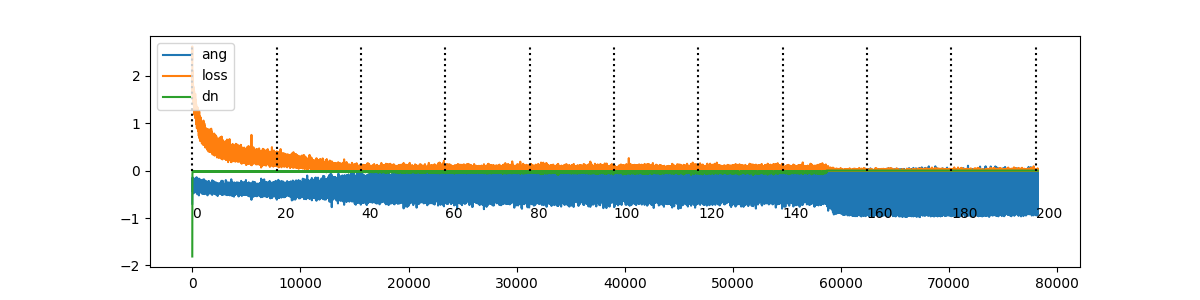

In [30]:
newton_cap_logs = [d for log in data["nc_logs"] for d in log]
delt_sqnorm, grad_sqnorm, delt_dot_grad, loss = zip(*newton_cap_logs)
dg_ang = delt_dot_grad / (np.array(delt_sqnorm)**.5 * np.array(grad_sqnorm)**.5)
# print(delt_sqnorm)
# print(grad_sqnorm)
# print(delt_dot_grad)
# print(loss)
loss = np.array(loss)
newton_ratio = - loss / delt_dot_grad # alpha / ||delta||
#newton_ratio = np.array(loss) / delt_sqnorm # alpha / ||delta||
#for t in range(1,len(loss)): loss[t] = .9*loss[t-1] + .1*loss[t]
# qtys = {"loss": loss, "grad_sqnorm": grad_sq_norm, "delt_sqnorm": delt_sqnorm, "delt_dot_grad":delt_dot_grad}
#qtys = {"loss": loss}
#qtys = {"nr": 1./newton_ratio}
qtys = {"ddg": np.array(delt_dot_grad), "dn": -np.array(delt_sqnorm), "loss": loss, "ang": np.array(dg_ang)}

# gradnorm doesn't get smaller after lr adjust

plt.close()
plt.figure(figsize=(12,3))
#for y in [loss, grad_sqnorm, delt_sqnorm, delt_dot_grad]:
#for y in [grad_sqnorm]:
#keys = list(qtys.keys())
keys = ["ang","loss", "dn"]
for k in keys:
    plt.plot(np.array(qtys[k]))
#plt.plot(newton_ratio < 1) # indicates cap exceeded
#plt.plot(1./newton_ratio) # >1 indicates cap exceeded
#plt.legend(['loss', 'grad_sqnorm', 'delt_sqnorm', 'delt_dot_grad', 'newton_ratio'],loc='upper left')
#plt.legend(['loss', 'grad_sqnorm', 'delt_sqnorm', 'delt_dot_grad'],loc='upper left')
# plt.legend(['grad_sqnorm'],loc='upper left')
plt.legend(keys,loc='upper left')
bars = np.arange(0,len(loss),390*20)
for b in bars:
    #plt.plot([b,b],[-1,5],'k:')
    plt.plot([b,b],[0, max([np.max(v) for v in qtys.values()])],'k:')
    plt.text(b,-1,str(int(b/390)))
if "nr" in qtys.keys(): plt.plot([0,len(loss)],[1,1],'k--')
#plt.ylim([0, .25])
#plt.xlim([50000,90500])
#plt.ylim([-2, 2])
plt.show()

# ResNet
Plot the training and test curves for all optimizers in one plot. "names" is a list containing the log files in "/curve" folder, "labels" is the corresponding legends for different optimizers. Note that "names" and "labels" must match (log for the i-th element in "labels" in the i-th element in "names")

<IPython.core.display.Javascript object>


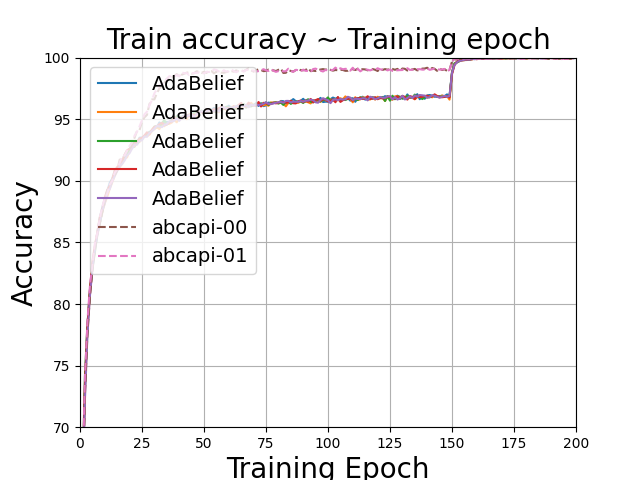

<IPython.core.display.Javascript object>


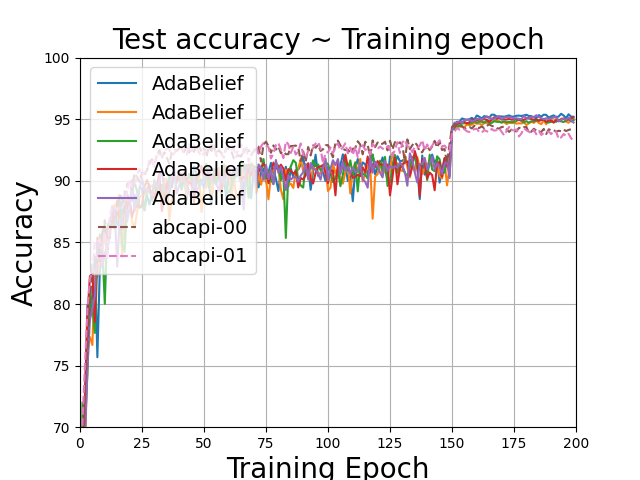

In [27]:
names = [
        'resnet-adabelief-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse-00',
        'resnet-adabelief-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse-01',
        'resnet-adabelief-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse-02',
        'resnet-adabelief-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse-03',
        'resnet-adabelief-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse-04',
        'resnet-abcapi-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse-00',
        'resnet-abcapi-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse-01',
          #'resnet-abcap-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse-00',
          #'resnet-abcap-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse-01',
          #'resnet-abcap-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse-02',
#          'resnet-sgd-lr0.1-momentum0.9-wdecay0.0005-run0-resetFalse',
#           'resnet-cap-lr0.1-momentum0.9-wdecay0.0005-run0-resetFalse',
#          'resnet-adabound-lr0.001-betas0.9-0.999-final_lr0.1-gamma0.001-wdecay0.0005-run0-resetFalse',
#          'resnet-yogi-lr0.001-betas0.9-0.999-eps0.001-wdecay0.0005-run0-resetFalse',
#          'resnet-adam-lr0.001-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
#          'resnet-msvag-lr0.1-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse',
#          'resnet-radam-lr0.001-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
#          'resnet-adamw-lr0.001-betas0.9-0.999-wdecay0.01-eps1e-08-run0-resetFalse',
#          'resnet-fromage-lr0.01-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
]
labels = [
          'AdaBelief',
          'AdaBelief',
          'AdaBelief',
          'AdaBelief',
          'AdaBelief',
           'abcapi-00',
          'abcapi-01'
           #'abcap-00',
           #'abcap-01',
           #'abcap-02',
#           'SGD',
#           'cap'
#           'AdaBound',
#           'Yogi',
#           'Adam',
#           'MSVAG',
#           'RAdam',
#           'AdamW',
#           'Fromage',
        ]
plot(names, 'Train', labels, ylim = (70, 100))
plot(names, 'Test', labels, ylim = (70,100)) 
#plot(names, 'Test', labels, ylim = (0,96))     

# DenseNet

<IPython.core.display.Javascript object>


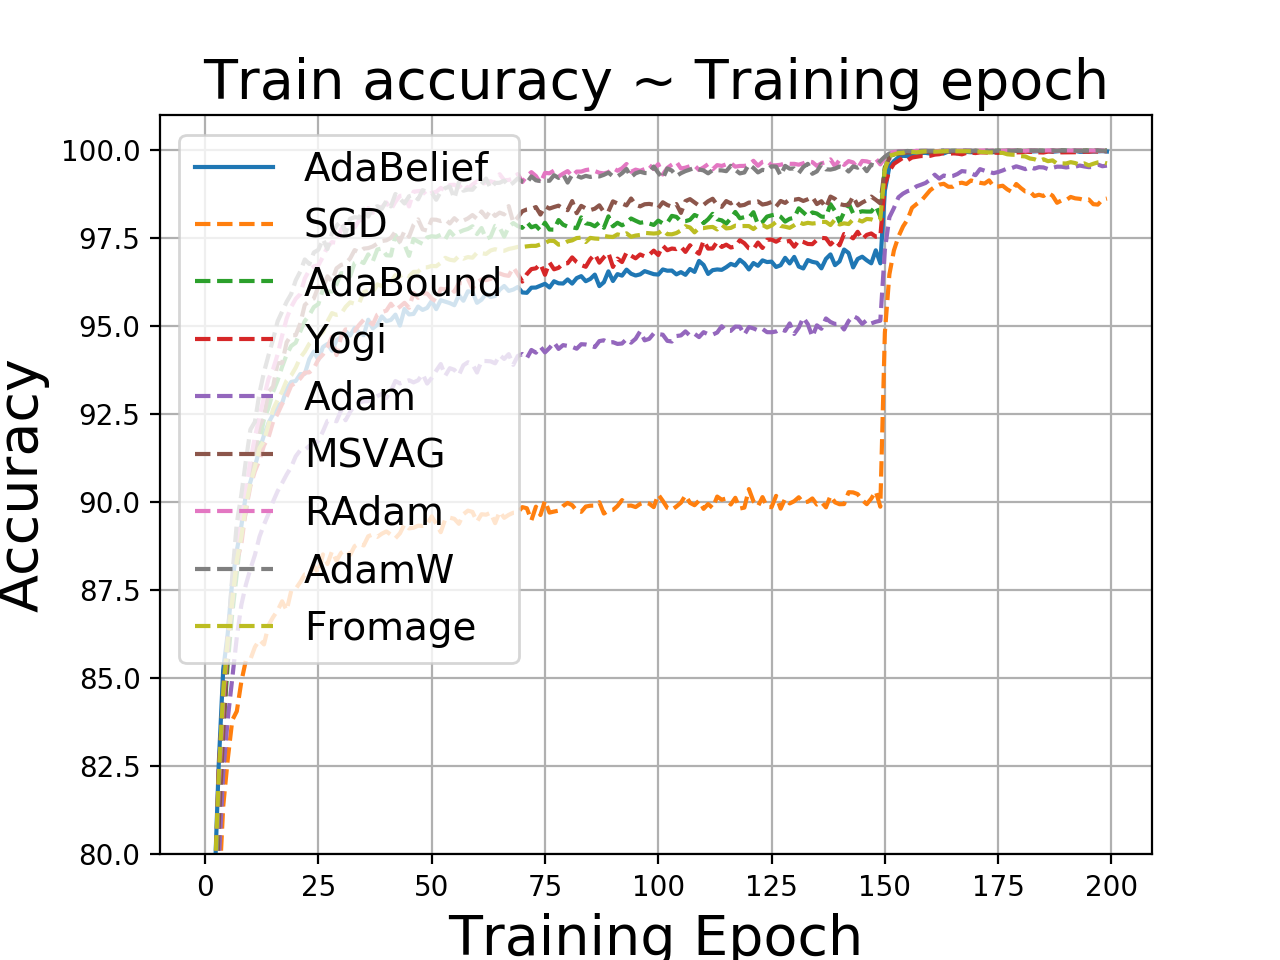

<IPython.core.display.Javascript object>


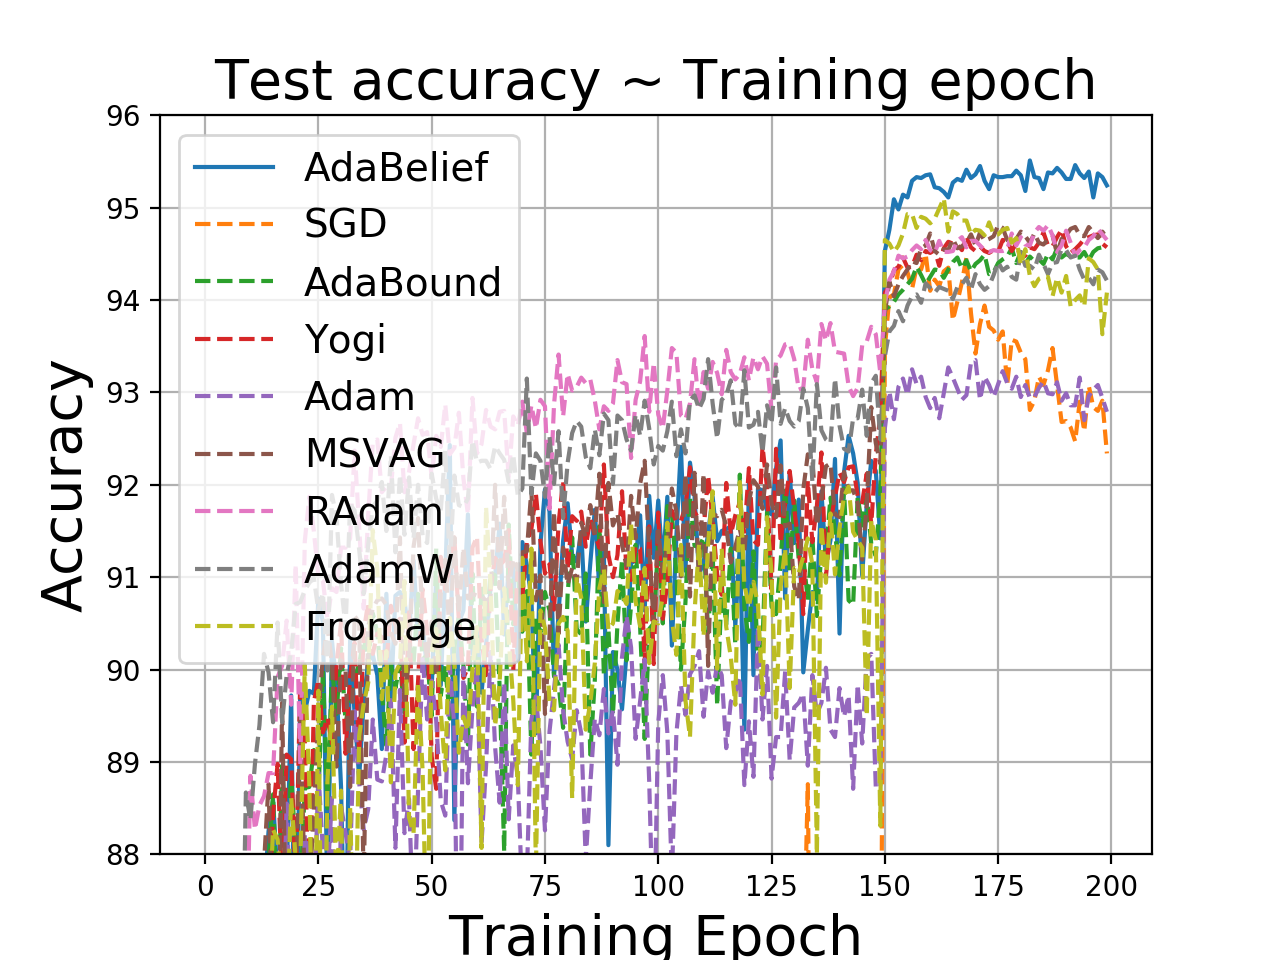

In [8]:
names = ['densenet-adabelief-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse',
         'densenet-sgd-lr0.1-momentum0.9-wdecay0.0005-run0-resetFalse',
         'densenet-adabound-lr0.001-betas0.9-0.999-final_lr0.1-gamma0.001-wdecay0.0005-run0-resetFalse',
         'densenet-yogi-lr0.001-betas0.9-0.999-eps0.001-wdecay0.0005-run0-resetFalse',
         'densenet-adam-lr0.001-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
         'densenet-msvag-lr0.1-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse',
         'densenet-radam-lr0.001-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
         'densenet-adamw-lr0.001-betas0.9-0.999-wdecay0.01-eps1e-08-run0-resetFalse',
         'densenet-fromage-lr0.01-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
]
labels = ['AdaBelief',
          'SGD',
          'AdaBound',
          'Yogi',
          'Adam',
          'MSVAG',
          'RAdam',
          'AdamW',
          'Fromage',
        ]
plot(names, 'Train', labels)
plot(names, 'Test', labels, ylim = (88,96))     

## VGG Network

<IPython.core.display.Javascript object>


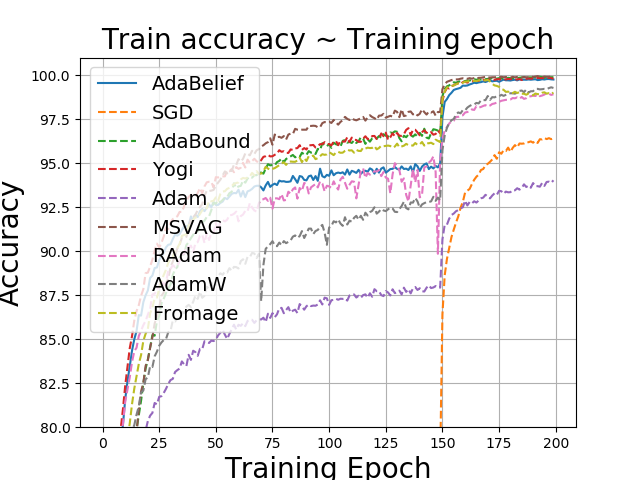

<IPython.core.display.Javascript object>


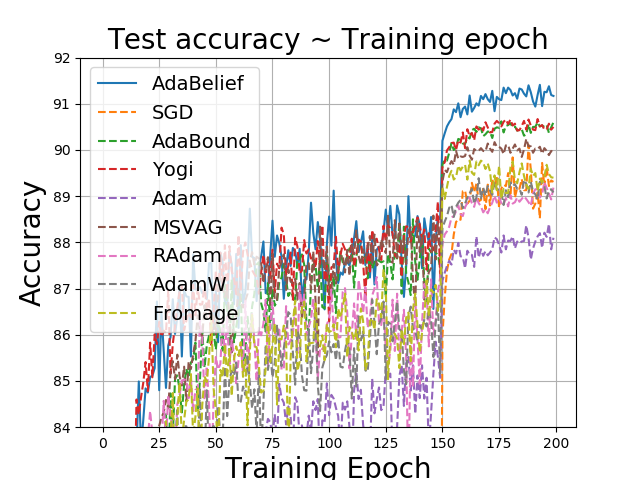

In [50]:
names = ['vgg-adabelief-lr0.001-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse',
         'vgg-sgd-lr0.1-momentum0.9-wdecay0.0005-run0-resetFalse',
         'vgg-adabound-lr0.001-betas0.9-0.999-final_lr0.1-gamma0.001-wdecay0.0005-run0-resetFalse',
         'vgg-yogi-lr0.001-betas0.9-0.999-eps0.001-wdecay0.0005-run0-resetFalse',
         'vgg-adam-lr0.001-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
         'vgg-msvag-lr0.1-betas0.9-0.999-eps1e-08-wdecay0.0005-run0-resetFalse',
         'vgg-radam-lr0.001-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
         'vgg-adamw-lr0.001-betas0.9-0.999-wdecay0.01-eps1e-08-run0-resetFalse',
         'vgg-fromage-lr0.01-betas0.9-0.999-wdecay0.0005-eps1e-08-run0-resetFalse',
]
labels = ['AdaBelief',
          'SGD',
          'AdaBound',
          'Yogi',
          'Adam',
          'MSVAG',
          'RAdam',
          'AdamW',
          'Fromage',
        ]
plot(names, 'Train', labels)
plot(names, 'Test', labels, ylim = (84,92))     